In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers
import numpy as np
from numpy.random import seed
from keras.optimizers import RMSprop
seed(1)

normalized_data = pd.read_csv("../Output/normalized_data_with_predicted_age.csv", index_col=0)
normalized_data 

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,STON/O,W./C.,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.274099,0.0,0.000000,0.015070,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,NaN,1.0,0.274099,0.0,0.000000,0.015127,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,NaN,1.0,0.344905,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into train and test

In [2]:
normalized_train_data = normalized_data[normalized_data.Survived.notna()]
normalized_test_data = normalized_data[normalized_data.Survived.isna()]
normalized_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,STON/O,W./C.,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0.0,1.0,0.326684,0.0,0.000000,0.014110,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.143992,1.6,0.333333,0.135753,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
869,0.0,1.0,0.344874,0.0,0.000000,0.018543,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating and validating model

In [3]:
x_train = normalized_train_data.drop(["Survived"], axis=1).values
y_train = normalized_train_data["Survived"].values

number_of_epochs = 50

number_of_folds = 7
number_of_samples = len(x_train) // number_of_folds

all_histories = []
for i in range(number_of_folds):
    print("processing fold #", i)
    
    partial_x_train = np.concatenate([x_train[:i*number_of_samples],
                                          x_train[(i+1)*number_of_samples:]])
    parital_y_train = np.concatenate([y_train[:i*number_of_samples],
                                          y_train[(i+1)*number_of_samples:]])
    
    partial_x_validation = x_train[i*number_of_samples:(i+1)*number_of_samples]
    partial_y_validation = y_train[i*number_of_samples:(i+1)*number_of_samples]
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(RMSprop(lr=0.001),
                  loss="binary_crossentropy",
                  metrics=["acc"])

    history = model.fit(partial_x_train,
                        parital_y_train,
                        epochs=number_of_epochs,
                        batch_size=16,
                        validation_data=[partial_x_validation,partial_y_validation])
    all_histories.append(history.history)



processing fold # 0
Train on 764 samples, validate on 127 samples
Epoch 1/50
764/764 [==============================] - 0s 528us/step - loss: 0.6561 - acc: 0.6335 - val_loss: 0.5546 - val_acc: 0.7953
Epoch 2/50
764/764 [==============================] - 0s 143us/step - loss: 0.5640 - acc: 0.7605 - val_loss: 0.4841 - val_acc: 0.8110
Epoch 3/50
764/764 [==============================] - 0s 146us/step - loss: 0.5233 - acc: 0.7762 - val_loss: 0.4644 - val_acc: 0.8031
Epoch 4/50
764/764 [==============================] - 0s 142us/step - loss: 0.5090 - acc: 0.7827 - val_loss: 0.4510 - val_acc: 0.8031
Epoch 5/50
764/764 [==============================] - 0s 130us/step - loss: 0.5162 - acc: 0.7853 - val_loss: 0.4431 - val_acc: 0.8110
Epoch 6/50
764/764 [==============================] - 0s 133us/step - loss: 0.4887 - acc: 0.7932 - val_loss: 0.4527 - val_acc: 0.8031
Epoch 7/50
764/764 [==============================] - 0s 144us/step - loss: 0.4747 - acc: 0.7971 - val_loss: 0.4484 - val_acc: 0.7

Epoch 11/50
764/764 [==============================] - 0s 117us/step - loss: 0.4495 - acc: 0.8076 - val_loss: 0.5099 - val_acc: 0.7717
Epoch 12/50
764/764 [==============================] - 0s 115us/step - loss: 0.4506 - acc: 0.8089 - val_loss: 0.5088 - val_acc: 0.7559
Epoch 13/50
764/764 [==============================] - 0s 118us/step - loss: 0.4414 - acc: 0.8102 - val_loss: 0.5117 - val_acc: 0.7795
Epoch 14/50
764/764 [==============================] - 0s 155us/step - loss: 0.4349 - acc: 0.8207 - val_loss: 0.5160 - val_acc: 0.7795
Epoch 15/50
764/764 [==============================] - 0s 125us/step - loss: 0.4485 - acc: 0.8115 - val_loss: 0.5100 - val_acc: 0.7795
Epoch 16/50
764/764 [==============================] - 0s 130us/step - loss: 0.4254 - acc: 0.8259 - val_loss: 0.5129 - val_acc: 0.7638
Epoch 17/50
764/764 [==============================] - 0s 174us/step - loss: 0.4150 - acc: 0.8246 - val_loss: 0.5185 - val_acc: 0.7795
Epoch 18/50
764/764 [==============================] - 

764/764 [==============================] - 0s 126us/step - loss: 0.4365 - acc: 0.8233 - val_loss: 0.3985 - val_acc: 0.8346
Epoch 22/50
764/764 [==============================] - 0s 114us/step - loss: 0.4433 - acc: 0.8181 - val_loss: 0.3992 - val_acc: 0.8268
Epoch 23/50
764/764 [==============================] - 0s 127us/step - loss: 0.4389 - acc: 0.8194 - val_loss: 0.3969 - val_acc: 0.8268
Epoch 24/50
764/764 [==============================] - 0s 120us/step - loss: 0.4503 - acc: 0.8220 - val_loss: 0.3989 - val_acc: 0.8268
Epoch 25/50
764/764 [==============================] - 0s 136us/step - loss: 0.4389 - acc: 0.8246 - val_loss: 0.3947 - val_acc: 0.8268
Epoch 26/50
764/764 [==============================] - 0s 115us/step - loss: 0.4280 - acc: 0.8285 - val_loss: 0.3988 - val_acc: 0.8346
Epoch 27/50
764/764 [==============================] - 0s 198us/step - loss: 0.4294 - acc: 0.8312 - val_loss: 0.3947 - val_acc: 0.8268
Epoch 28/50
764/764 [==============================] - 0s 152us/ste

764/764 [==============================] - 0s 126us/step - loss: 0.4242 - acc: 0.8312 - val_loss: 0.4552 - val_acc: 0.8031
Epoch 32/50
764/764 [==============================] - 0s 126us/step - loss: 0.4269 - acc: 0.8181 - val_loss: 0.4614 - val_acc: 0.7874
Epoch 33/50
764/764 [==============================] - 0s 117us/step - loss: 0.4190 - acc: 0.8285 - val_loss: 0.4612 - val_acc: 0.8031
Epoch 34/50
764/764 [==============================] - 0s 122us/step - loss: 0.4268 - acc: 0.8181 - val_loss: 0.4634 - val_acc: 0.7953
Epoch 35/50
764/764 [==============================] - 0s 114us/step - loss: 0.4302 - acc: 0.8207 - val_loss: 0.4617 - val_acc: 0.7953
Epoch 36/50
764/764 [==============================] - 0s 121us/step - loss: 0.4328 - acc: 0.8220 - val_loss: 0.4561 - val_acc: 0.7953
Epoch 37/50
764/764 [==============================] - 0s 135us/step - loss: 0.4313 - acc: 0.8298 - val_loss: 0.4591 - val_acc: 0.7874
Epoch 38/50
764/764 [==============================] - 0s 167us/ste

764/764 [==============================] - 0s 116us/step - loss: 0.4134 - acc: 0.8416 - val_loss: 0.4341 - val_acc: 0.8031
Epoch 42/50
764/764 [==============================] - 0s 116us/step - loss: 0.4240 - acc: 0.8325 - val_loss: 0.4356 - val_acc: 0.8110
Epoch 43/50
764/764 [==============================] - 0s 116us/step - loss: 0.4265 - acc: 0.8351 - val_loss: 0.4384 - val_acc: 0.8031
Epoch 44/50
764/764 [==============================] - 0s 117us/step - loss: 0.4108 - acc: 0.8442 - val_loss: 0.4386 - val_acc: 0.8031
Epoch 45/50
764/764 [==============================] - 0s 116us/step - loss: 0.4135 - acc: 0.8377 - val_loss: 0.4361 - val_acc: 0.8110
Epoch 46/50
764/764 [==============================] - 0s 115us/step - loss: 0.4133 - acc: 0.8325 - val_loss: 0.4404 - val_acc: 0.8110
Epoch 47/50
764/764 [==============================] - 0s 115us/step - loss: 0.4180 - acc: 0.8351 - val_loss: 0.4459 - val_acc: 0.8031
Epoch 48/50
764/764 [==============================] - 0s 116us/ste

764/764 [==============================] - 0s 613us/step - loss: 0.6305 - acc: 0.6636 - val_loss: 0.5252 - val_acc: 0.8425
Epoch 2/50
764/764 [==============================] - 0s 108us/step - loss: 0.5749 - acc: 0.7448 - val_loss: 0.4621 - val_acc: 0.8268
Epoch 3/50
764/764 [==============================] - 0s 128us/step - loss: 0.5298 - acc: 0.7801 - val_loss: 0.4406 - val_acc: 0.8268
Epoch 4/50
764/764 [==============================] - 0s 131us/step - loss: 0.5225 - acc: 0.7696 - val_loss: 0.4197 - val_acc: 0.8425
Epoch 5/50
764/764 [==============================] - 0s 121us/step - loss: 0.5057 - acc: 0.7814 - val_loss: 0.4134 - val_acc: 0.8425
Epoch 6/50
764/764 [==============================] - 0s 115us/step - loss: 0.5096 - acc: 0.7853 - val_loss: 0.4096 - val_acc: 0.8504
Epoch 7/50
764/764 [==============================] - 0s 137us/step - loss: 0.4973 - acc: 0.7736 - val_loss: 0.4056 - val_acc: 0.8504
Epoch 8/50
764/764 [==============================] - 0s 117us/step - los

## Drawing plots

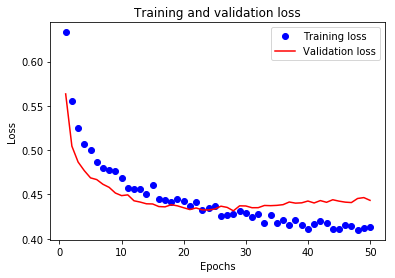

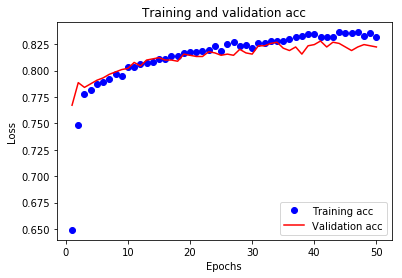

In [8]:
history_dict = history.history

loss_values = [np.mean([x["loss"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_loss_values = [np.mean([x["val_loss"][i] for x in all_histories]) for i in range(number_of_epochs)]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss", color="red")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

acc_values = [np.mean([x["acc"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_acc_values = [np.mean([x["val_acc"][i] for x in all_histories]) for i in range(number_of_epochs)]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc", color="red")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results

In [5]:
results = model.predict(normalized_test_data.drop(["Survived"], axis=1))
results = pd.DataFrame(results, columns=["Survived"], index=normalized_test_data.index)

results.loc[results.Survived < 0.5, ["Survived"]] = 0
results.loc[results.Survived >= 0.5, ["Survived"]] = 1
results = results.fillna(0)
results.Survived = results.Survived.astype(int)
results

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1300,1
1302,1
1305,0


## Save results

In [6]:
results.to_csv("../Output/my_prediction.csv", index=True)

## Compare with genderr submission

In [9]:
compare = pd.read_csv("../Dataset/gender_submission.csv", index_col=0)
compare = compare.rename(columns={"Survived": "Example"})
compare = pd.concat([compare, results], axis=1)
compare = compare.rename(columns={"Survived": "MyPrediction"})
compare[compare.Example != compare.MyPrediction]

,Example,MyPrediction
PassengerId,,
893,1,0
913,0,1
925,1,0
928,1,0
929,1,0
956,0,1
964,1,0
972,0,1
980,1,0
